Some keywords to calrify
- Keypoints
- Features
- Keypoint features
- interest points
- correspondences

Given the large number of feature detectors that have been de- veloped in computer vision, how can we decide which ones to use?

- **`measuring the repeatability of feature detectors`**: is defined as the frequency with which keypoints detected in one image are found within ε (say, ε = 1.5) pixels of the corresponding location in a transformed image.

- **`Scale Invariance`**: to extract features that are stable in both location and scale
- **`Rotational invariance and orientation estimation`**: to estimate a dominant orientation at each detected keypoint. Once the local orientation and scale of a keypoint have been estimated, a scaled and oriented patch around the detected point can be extracted and used to form a feature descriptor.
- **`Affine Invariance`**: While scale and rotation invariance are highly desirable, for many applications such as wide baseline stereo matching, full affine invariance is preferred

## 1. Canny Edge Detection

Canny edge detection consists of multiple steps:
1. Noise reduction using Gaussian filter.
2. Gradient calculation in the x and y directions.
3. Non-maximum suppression to thin out edges.
4. Double thresholding and edge tracking by hysteresis.

References:
- https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html?ref=blog.roboflow.com
- https://en.wikipedia.org/wiki/Canny_edge_detector

### OpenCV Canny Edge Detection
Here, we will use OpenCV's built-in `cv2.Canny()` function for edge detection.


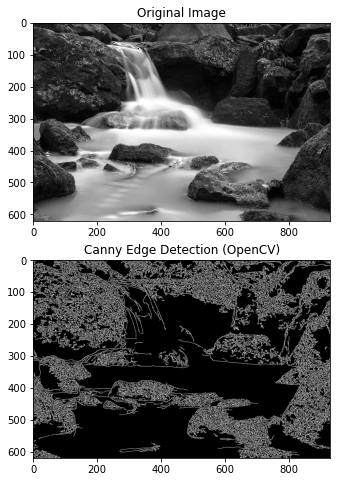

In [16]:
# OpenCV Implementation
img = cv.imread('assets/waterfall.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(img_gray, 50, 150, L2gradient= 0) # parameters are threshold1 and threshold2, L2gradient determines which function to use for calculating the gradient

# Displaying using matplotlib
plt.figure(figsize=(12, 8)) 
plt.subplot(2,1,1),plt.imshow(img,'gray')
plt.title('Original Image')
plt.subplot(2,1,2),plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection (OpenCV)')
plt.show()


### Self-defined Canny Edge Detection Class
We will create a class that implements the Canny edge detection step-by-step and allows for intermediate plotting.

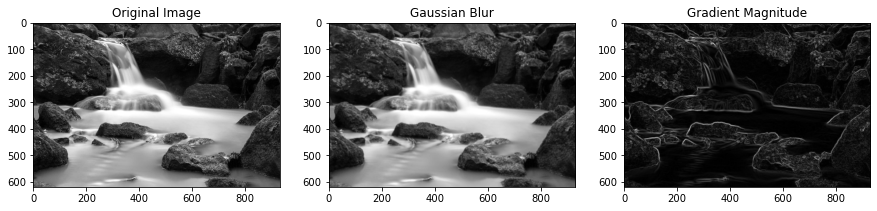

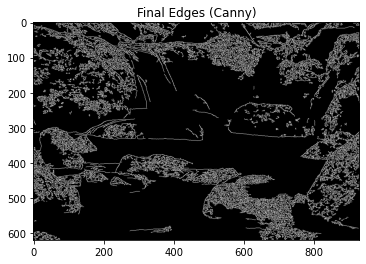

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

class CannyEdgeDetector:
    def __init__(self, img, low_thresh, high_thresh):
        self.img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        self.low_thresh = low_thresh
        self.high_thresh = high_thresh
        self.gaussian_blur = None
        self.gradient_magnitude = None
        self.edges = None
    
    def apply_gaussian_blur(self, kernel_size=5):
        self.gaussian_blur = cv.GaussianBlur(self.img, (kernel_size, kernel_size), 1.4)
        return self.gaussian_blur
    
    def calculate_gradient(self):
        gx = cv.Sobel(self.gaussian_blur, cv.CV_64F, 1, 0, ksize=3)
        gy = cv.Sobel(self.gaussian_blur, cv.CV_64F, 0, 1, ksize=3)
        self.gradient_magnitude = np.sqrt(gx**2 + gy**2)
        return self.gradient_magnitude
    
    def detect_edges(self):
        self.edges = cv.Canny(self.img, self.low_thresh, self.high_thresh)
        return self.edges

    def plot_intermediate_steps(self):
        # Plot the original image, blurred image, and gradient magnitude
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
        ax[0].imshow(self.img, cmap='gray')
        ax[0].set_title('Original Image')
        ax[1].imshow(self.gaussian_blur, cmap='gray')
        ax[1].set_title('Gaussian Blur')
        ax[2].imshow(self.gradient_magnitude, cmap='gray')
        ax[2].set_title('Gradient Magnitude')
        plt.show()

# Example usage with intermediate steps plotted
img = cv.imread('assets/waterfall.jpg')
canny = CannyEdgeDetector(img, 100, 250)
canny.apply_gaussian_blur()
canny.calculate_gradient()
canny.plot_intermediate_steps()
edges = canny.detect_edges()

# Display the final edges
plt.imshow(edges, cmap='gray')
plt.title('Final Edges (Canny)')
plt.show()
